# In this first example, we will generate a nematic field with a pair of $\pm 1/2$ defects, plot the nematic director and find the defect positions and orientations.

### Modules/functions used:
* nematic_plot
* defect_finder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from actnempy.utils import nematic_plot
from actnempy.utils import defect_finder as df

## Function to generate the nematic director

In [2]:
def defectpair(X, Y, dist, varphi1, varphi2, rcore=0.1):
    '''
    Function to generate the orientation profile for a pair
    of +-1/2 defects centered at (-dist/2,0) and (dist/2,0) respectively.
    varphi1 and varphi2 set the orientation of the minus and the plus half defects.
    rcore sets the defect core size.
    Refer to Eq. (33) of X. Tang and J. V. Selinger, Soft Matter 13, 5481 (2017).
    '''
    dth = varphi2-varphi1 + np.pi/2
    Th = varphi1 - np.pi/2
    th = ( -0.5*np.arctan2(X+0.5*dist, Y) 
          + 0.5*np.arctan2(X-0.5*dist, Y) 
          + 0.5*dth*(1+(np.log((X+0.5*dist)**2+Y**2)-np.log((X-0.5*dist)**2+Y**2))/(2*np.log(dist/rcore)))
          + Th)

    th[((X+0.5*dist)**2+Y**2<rcore**2)] = 0
    th[((X-0.5*dist)**2+Y**2<rcore**2)] = 0
    
    return th.T


## Generate and plot the director

In [3]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

dx = x[1]-x[0]
dy = y[1]-y[0]
X, Y = np.meshgrid(x, y, indexing="ij")

th = defectpair(X, Y, 10, np.pi/3, 0)

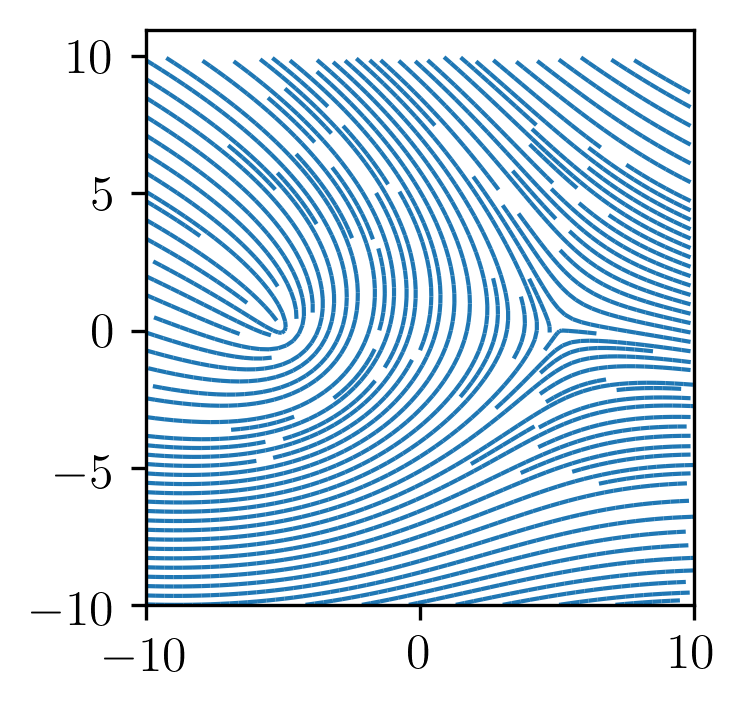

In [4]:
nx = np.cos(th)
ny = np.sin(th)

nematic_plot(x, y, nx, ny, density=2)
plt.gca().set_aspect("equal")

## Identify defect positions and orientations

In [5]:
# create charge density map
_, map_p, map_m = df.func_defectfind(nx, ny, filter_radius=5, switchsign=0)

# search map and identify circular regions of positive and negative charge
centroids_p = df.func_defectpos(map_p, areathresh=60)
centroids_m = df.func_defectpos(map_m, areathresh=60)

# get the oriengation of defects
phi_p = df.func_defectorient(centroids_p, nx, ny, filter_radius=5, type_str="positive")
phi_m = df.func_defectorient(centroids_m, nx, ny, filter_radius=5, type_str="negative")

Text(0, 0.5, 'y')

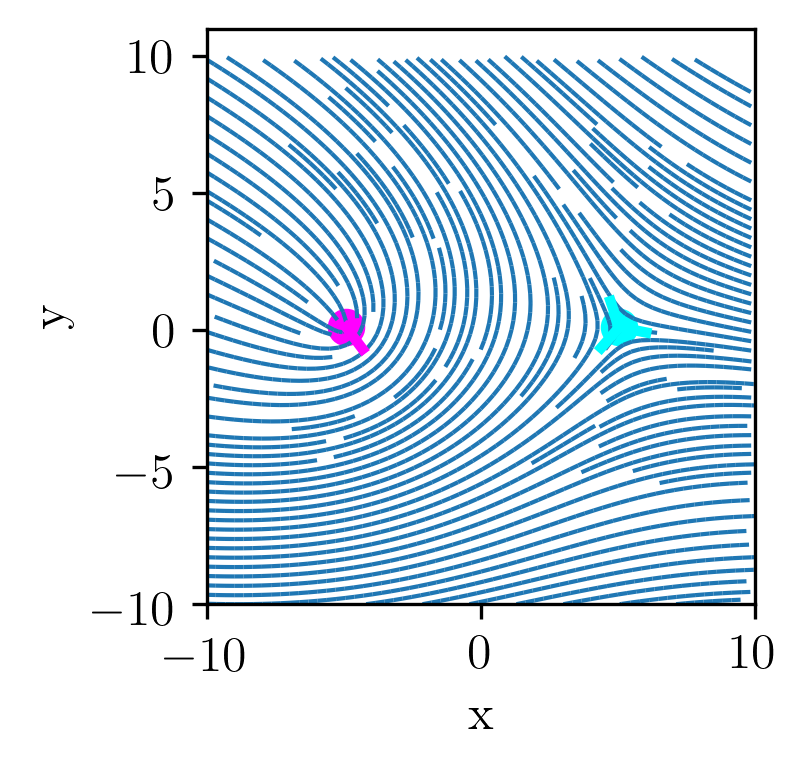

In [6]:
fig, ax = plt.subplots()
nematic_plot(x, y, nx, ny, density=2.0)
#ax.imshow(fluorescence, cmap=plt.cm.gray)
ax.set_aspect('equal', adjustable='box')
color_p = 'magenta'
color_m = 'cyan'
defect_scale = 1

cp = centroids_p*dx - 10
cm = centroids_m*dx - 10
df.func_plotdefects(ax, cp, phi_p, color_p, "positive", defect_scale)
df.func_plotdefects(ax, cm, phi_m, color_m, "negative", defect_scale)

plt.xlabel(r"x")
plt.ylabel(r"y")
